# **Anomaly Maps for SSP370 PR (2041-2050) minus Historical PR (1961-1990) for EAS**

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import time

In [2]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=40, memory_limit="20GB", threads_per_worker=1, processes=True, dashboard_address=":8071")
client = Client(cluster)
client

/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8071 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44337 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:44337/status,
Dashboard: http://127.0.0.1:44337/status,Workers: 40
Total threads: 40,Total memory: 745.06 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33275,Workers: 40
Dashboard: http://127.0.0.1:44337/status,Total threads: 40
Started: Just now,Total memory: 745.06 GiB
Comm: tcp://127.0.0.1:37833,Total threads: 1
Dashboard: http://127.0.0.1:39461/status,Memory: 18.63 GiB
Nanny: tcp://127.0.0.1:32793,


In [3]:
start_time = time.time()

#historical data
mri_hist = xr.open_dataarray('mri_historical_1961_1990_eas.nc')
noresm_hist = xr.open_dataarray('noresm_historical_1961_1990_eas.nc')
cesm_hist = xr.open_dataarray('cesm_historical_1961_1990_eas.nc')
ec_hist = xr.open_dataarray('ec_historical_1961_1990_eas.nc')

#SSP370 data
mri_ssp = xr.open_dataarray('mri_ssp370_2041-2050_eas.nc')
noresm_ssp = xr.open_dataarray('noresm_ssp370_2041-2050_eas.nc')
cesm_ssp = xr.open_dataarray('cesm_ssp370_2041-2050_eas.nc')
ec_ssp = xr.open_dataarray('ec_ssp370_2041-2050_eas.nc')

# ideally these should be regridded to the same resolution (ssp370:zarr stores, historical:netCDFs)

#anomalies
mri_anom = mri_ssp - mri_hist
noresm_anom = noresm_ssp - noresm_hist
cesm_anom = cesm_ssp - cesm_hist
ec_anom = ec_ssp - ec_hist

#min and max anomolies for scaling
print("ANOMALY MIN/MAX VALUES\n")
print(f"MRI-ESM2-0:        min = {mri_anom.min().values:.3f}, max = {mri_anom.max().values:.3f}")
print(f"NorESM2-LM:        min = {noresm_anom.min().values:.3f}, max = {noresm_anom.max().values:.3f}")
print(f"CESM2:             min = {cesm_anom.min().values:.3f}, max = {cesm_anom.max().values:.3f}")
print(f"EC-Earth3-AerChem: min = {ec_anom.min().values:.3f}, max = {ec_anom.max().values:.3f}")

#overall range
all_anoms = [mri_anom, noresm_anom, cesm_anom, ec_anom]
overall_min = min([a.min().values for a in all_anoms])
overall_max = max([a.max().values for a in all_anoms])
print(f"\nOverall range: {overall_min:.3f} to {overall_max:.3f}")
print(f"Suggested levels: np.linspace({overall_min:.1f}, {overall_max:.1f}, 13)")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")



ANOMALY MIN/MAX VALUES

MRI-ESM2-0:        min = -0.641, max = 0.512
NorESM2-LM:        min = -0.380, max = 1.190
CESM2:             min = -0.372, max = 0.788
EC-Earth3-AerChem: min = -1.244, max = 0.560

Overall range: -1.244 to 1.190
Suggested levels: np.linspace(-1.2, 1.2, 13)
Runtime: 6.94 seconds


# MRI-ESM2-0

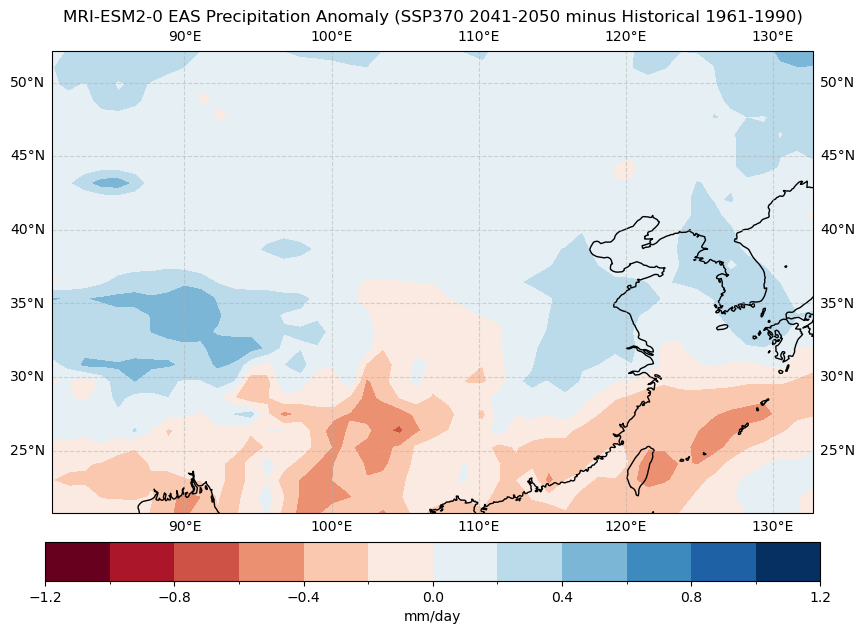

Runtime: 0.44 seconds


In [4]:
import time
start_time = time.time()

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

mri_anom.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(-1.2, 1.2, 13),
                   cmap='RdBu',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
ax.set_title("MRI-ESM2-0 EAS Precipitation Anomaly (SSP370 2041-2050 minus Historical 1961-1990)")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")

In [5]:
print(f"NaNs in historical: {mri_hist.isnull().sum().values}")
print(f"NaNs in SSP370: {mri_ssp.isnull().sum().values}")
print(f"NaNs in anomaly: {mri_anom.isnull().sum().values}")

NaNs in historical: 0
NaNs in SSP370: 0
NaNs in anomaly: 0


# NorESM2-LM

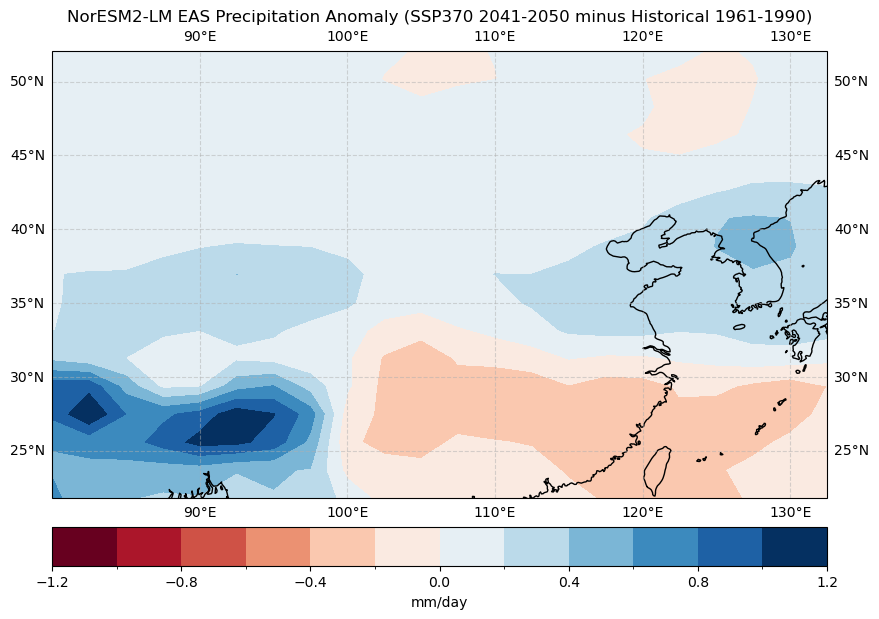

Runtime: 0.19 seconds


In [6]:
start_time = time.time()

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

noresm_anom.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(-1.2, 1.2, 13),
                   cmap='RdBu',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
ax.set_title("NorESM2-LM EAS Precipitation Anomaly (SSP370 2041-2050 minus Historical 1961-1990)")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")

In [7]:
print(f"NaNs in historical: {noresm_hist.isnull().sum().values}")
print(f"NaNs in SSP370: {noresm_ssp.isnull().sum().values}")
print(f"NaNs in anomaly: {noresm_anom.isnull().sum().values}")

NaNs in historical: 0
NaNs in SSP370: 0
NaNs in anomaly: 0


# CESM2

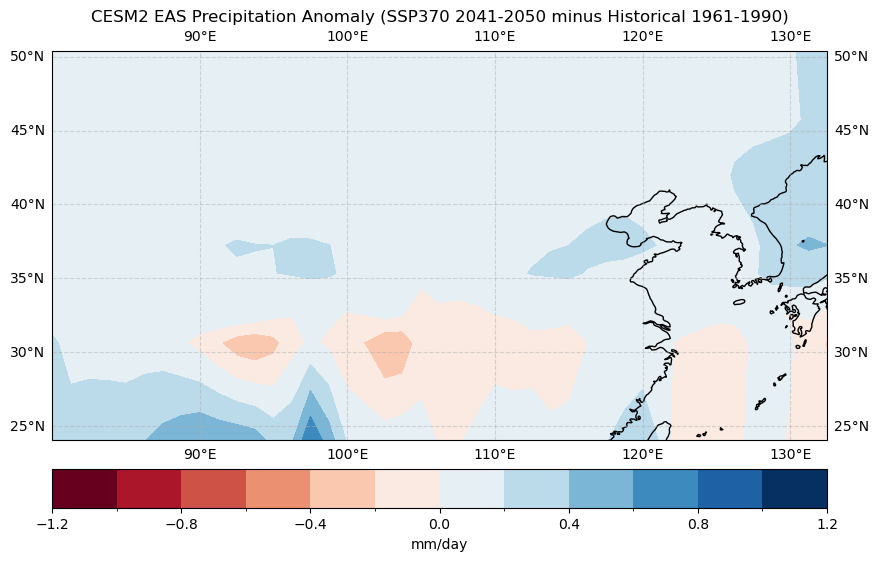

Runtime: 0.31 seconds


In [8]:
import time
start_time = time.time()

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

cesm_anom.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(-1.2, 1.2, 13),
                   cmap='RdBu',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
ax.set_title("CESM2 EAS Precipitation Anomaly (SSP370 2041-2050 minus Historical 1961-1990)")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")

In [9]:
print(f"NaNs in historical: {cesm_hist.isnull().sum().values}")
print(f"NaNs in SSP370: {cesm_ssp.isnull().sum().values}")
print(f"NaNs in anomaly: {cesm_anom.isnull().sum().values}")

NaNs in historical: 0
NaNs in SSP370: 0
NaNs in anomaly: 0


# EC-Earth3-AerChem

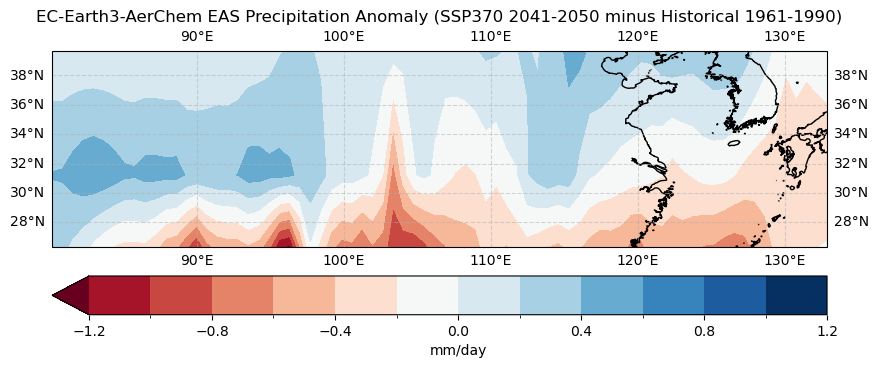

Runtime: 0.86 seconds


In [10]:
import time
start_time = time.time()

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

ec_anom.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(-1.2, 1.2, 13),
                   cmap='RdBu',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
ax.set_title("EC-Earth3-AerChem EAS Precipitation Anomaly (SSP370 2041-2050 minus Historical 1961-1990)")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")

In [11]:
#checking grids
print("Historical grid:")
print(ec_hist.lat.values)
print(ec_hist.lon.values)
print(ec_hist.shape)

print("\nSSP370 grid:")
print(ec_ssp.lat.values)
print(ec_ssp.lon.values)
print(ec_ssp.shape)

Historical grid:
[20.70171    20.70171325 21.4034661  21.40347    22.10521894 22.10522
 22.80697    22.80697177 23.50872    23.50872458 24.21047737 24.21048
 24.91223    24.91223014 25.61398    25.6139829  26.31573    26.31573564
 27.01748835 27.01749    27.71924    27.71924105 28.42099    28.42099372
 29.12274637 29.12275    29.824499   29.8245     30.52625    30.5262516
 31.228      31.22800418 31.92975673 31.92976    32.63150925 32.63151
 33.33326    33.33326174 34.0350142  34.03502    34.73676663 34.73677
 35.43851902 35.43852    36.14027    36.14027138 36.84202    36.8420237
 37.54377599 37.54378    38.24552823 38.24553    38.94728    38.94728044
 39.64903    39.6490326  40.35078    40.35078471 41.05253678 41.05254
 41.75428879 41.75429    42.45604    42.45604076 43.15779    43.15779267
 43.85954    43.85954452 44.56129    44.56129631 45.26304804 45.26305
 45.9647997  45.9648     46.66655    46.66655129 47.3683     47.3683028
 48.07005    48.07005424 48.7718     48.7718056  49.473

In [12]:
#regridding historical to match SSP370 (cleaner grid)
ec_hist_regridded = ec_hist.interp(lat=ec_ssp.lat, lon=ec_ssp.lon, method='linear')

ec_anom = ec_ssp - ec_hist_regridded
print(f"Anomaly shape: {ec_anom.shape}")  # should be (47, 76)

Anomaly shape: (47, 76)


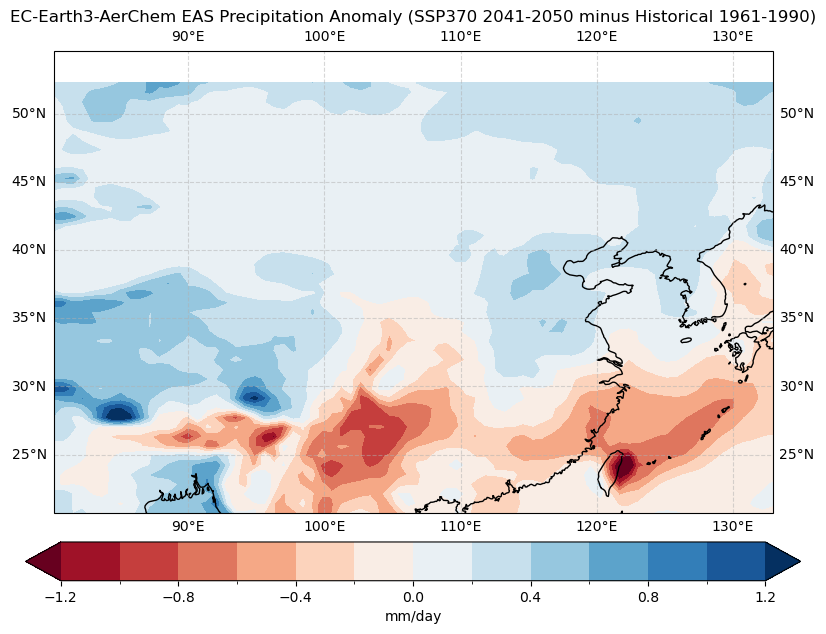

Runtime: 0.21 seconds


In [13]:
start_time = time.time()

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

ec_anom.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(-1.2, 1.2, 13),
                   cmap='RdBu',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
ax.set_title("EC-Earth3-AerChem EAS Precipitation Anomaly (SSP370 2041-2050 minus Historical 1961-1990)")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")

In [14]:
print(f"NaNs in historical: {ec_hist.isnull().sum().values}")
print(f"NaNs in SSP370: {ec_ssp.isnull().sum().values}")
print(f"NaNs in anomaly: {ec_anom.isnull().sum().values}")

NaNs in historical: 0
NaNs in SSP370: 0
NaNs in anomaly: 76


In [15]:
# using nearest neighbor when calculating anomaly - reindex historical to match ssp370
ec_hist_regridded = ec_hist.reindex(lat=ec_ssp.lat, lon=ec_ssp.lon, method='nearest')

ec_anom = ec_ssp - ec_hist_regridded
print(f"NaNs in anomaly: {ec_anom.isnull().sum().values}")

NaNs in anomaly: 0


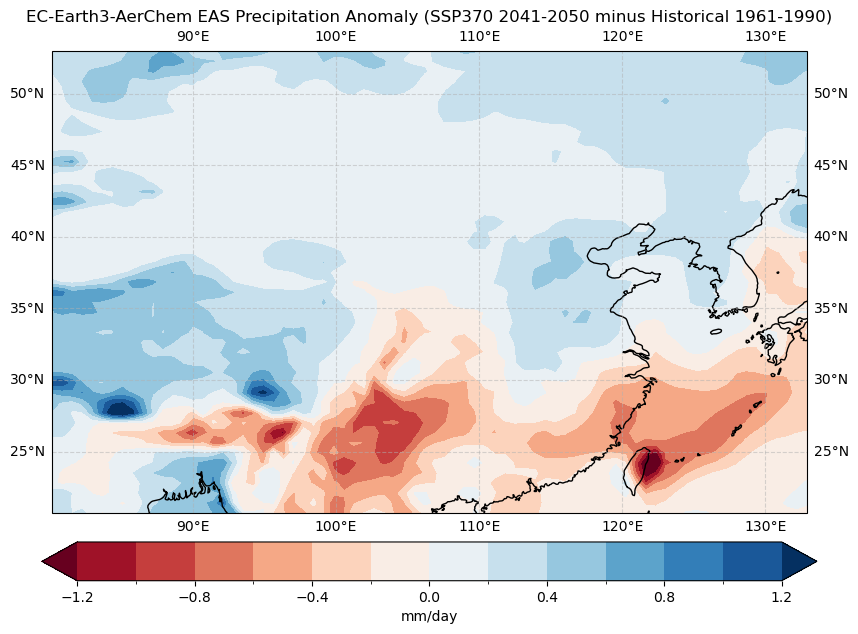

Runtime: 0.19 seconds


In [16]:
start_time = time.time()

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

ec_anom.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(-1.2, 1.2, 13),
                   cmap='RdBu',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
ax.set_title("EC-Earth3-AerChem EAS Precipitation Anomaly (SSP370 2041-2050 minus Historical 1961-1990)")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")

# Multimodel mean 

**METHOD 1: mean(ssp370) - mean(historical)**

In [17]:
start_time = time.time()

#multimodel hist
multi_hist = xr.open_dataarray('multimodel_historical_1961_1990_eas.nc')

#multimodel SSP370
multi_ssp370 = xr.open_dataarray('multimodel_ssp370_2041-2050_eas.nc')

#both are already regridded to coursest res model = noresm

#anomalies
multi_anom = multi_ssp370 - multi_hist

#min and max anomolies for scaling
print("ANOMALY MIN/MAX VALUES\n")
print(f"multimodel mean:   min = {multi_anom.min().values:.3f}, max = {multi_anom.max().values:.3f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")


ANOMALY MIN/MAX VALUES

multimodel mean:   min = -0.546, max = 0.639
Runtime: 0.01 seconds


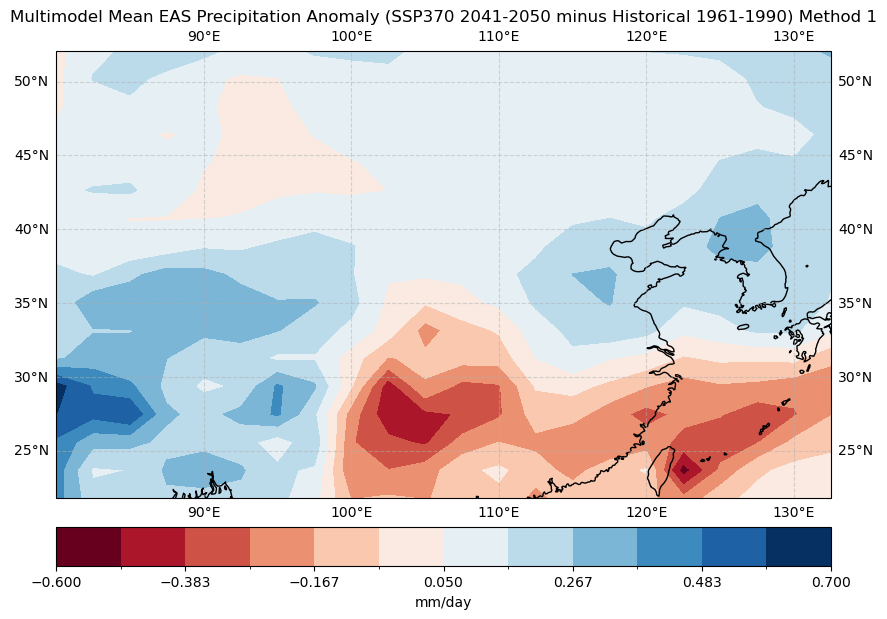

Runtime: 0.18 seconds


In [36]:
start_time = time.time()

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

multi_anom.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(-0.6, 0.7, 13),
                   cmap='RdBu',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
ax.set_title("Multimodel Mean EAS Precipitation Anomaly (SSP370 2041-2050 minus Historical 1961-1990) Method 1")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")

**METHOD 2: Mean(ssp-historical)**

In [27]:
#calculate anomalies first, then average
mri_anom = mri_ssp - mri_hist
noresm_anom = noresm_ssp - noresm_hist
cesm_anom = cesm_ssp - cesm_hist
ec_anom = ec_ssp - ec_hist
multimodel_anomaly = (mri_anom + noresm_anom + cesm_anom + ec_anom) / 4

# Check the shapes of each anomaly
print(f"MRI anomaly shape: {mri_anom.shape}")
print(f"NorESM anomaly shape: {noresm_anom.shape}")
print(f"CESM anomaly shape: {cesm_anom.shape}")
print(f"EC anomaly shape: {ec_anom.shape}")


MRI anomaly shape: (29, 47)
NorESM anomaly shape: (17, 22)
CESM anomaly shape: (8, 43)
EC anomaly shape: (3, 76)


In [28]:
all_anoms = xr.concat([mri_anom, noresm_anom, cesm_anom, ec_anom], dim='model')
multimodel_anomaly = all_anoms.mean(dim='model')
multimodel_anomaly = multimodel_anomaly.compute()

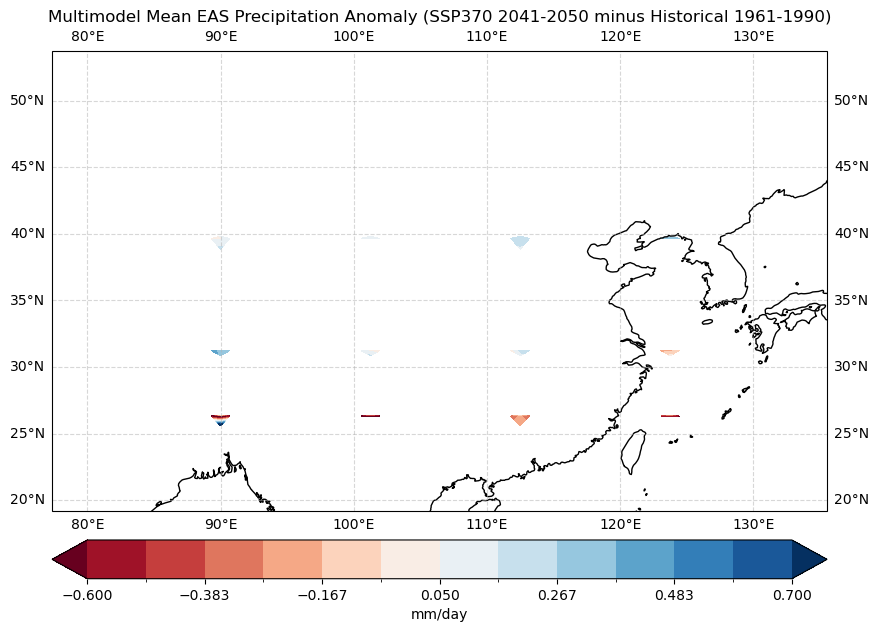

Runtime: 0.21 seconds


In [29]:
start_time = time.time()

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

multimodel_anomaly.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(-0.6, 0.7, 13),
                   cmap='RdBu',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
ax.set_title("Multimodel Mean EAS Precipitation Anomaly (SSP370 2041-2050 minus Historical 1961-1990)")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")

In [30]:
#regridding
all_anoms_regrid = xr.concat([
    noresm_anom,
    mri_anom.interp(lat=noresm_anom.lat, lon=noresm_anom.lon, method='linear'),
    cesm_anom.interp(lat=noresm_anom.lat, lon=noresm_anom.lon, method='linear'),
    ec_anom.interp(lat=noresm_anom.lat, lon=noresm_anom.lon, method='linear')
], dim='model')

multimodel_anomaly = all_anoms_regrid.mean(dim='model').compute()

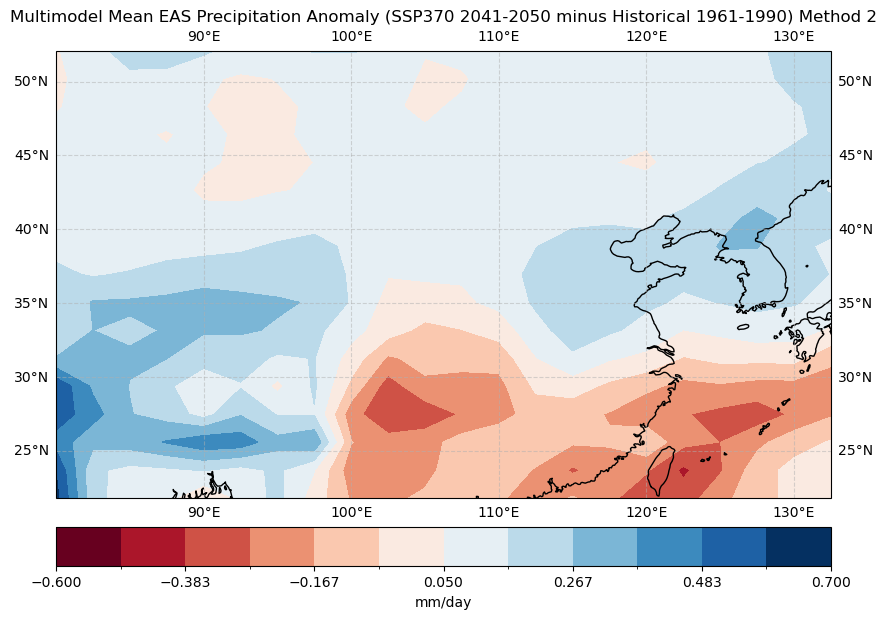

Runtime: 0.18 seconds


In [35]:
start_time = time.time()

fig = plt.figure(figsize=[10,7.5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

multimodel_anomaly.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree(),
                   levels=np.linspace(-0.6, 0.7, 13),
                   cmap='RdBu',
                   cbar_kwargs={"label":'mm/day', "orientation": 'horizontal', "pad": 0.05})

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
ax.set_title("Multimodel Mean EAS Precipitation Anomaly (SSP370 2041-2050 minus Historical 1961-1990) Method 2")
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Runtime: {elapsed_time:.2f} seconds")